<a href="https://colab.research.google.com/github/BhattacharyaSumit/DAAD-WISE-IRL/blob/main/DAAD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Miscellaneous

In [ ]:
!git clone  https://github.com/cvlab-stonybrook/Scanpath_Prediction

Cloning into 'Scanpath_Prediction'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 214 (delta 121), reused 103 (delta 44), pack-reused 0
Receiving objects: 100% (214/214), 28.01 MiB | 22.01 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [ ]:
cp -R  /content/drive/MyDrive/processed2 /content/Scanpath_Prediction

In [ ]:
cd /content/Scanpath_Prediction

/content/Scanpath_Prediction


In [ ]:
#pwd

'/content/Scanpath_Prediction'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
my_path = "/content/drive/MyDrive/images/bottle/" + "000000211326.jpg"

In [ ]:
pp =  plt.imread(my_path)
plt.imshow(pp)
plt.show()

In [ ]:
import os
import pickle
import json
import numpy as np

In [ ]:
with open('/content/human_scanpaths_TP_trainval_valid.json', "rb") as fp:
  all_data = json.load(fp)

In [ ]:
valids = list(filter(lambda x : x['correct']==1, all_data ))

In [ ]:
cat_names = list(np.unique([x['task'] for x in valids]))

In [ ]:
lt = []
while len(cat_names)!=0:
  for x in valids:
     if x['task'] == cat_names[0]:
       lt.append(x)
       cat_names.pop(0)
       break

In [ ]:
my_aux = {
        "name": "000000350270.jpg",
        "subject": 2,
        "task": "bottle",
        "condition": "present",
        "bbox": [
            96,
            16,
            46,
            112
        ],
        "X": [
            258.40761904761905,
            132.35809523809525,
            117.85142857142858,
            114.19428571428573,
            117.66857142857144
        ],
        "Y": [
            121.72190476190477,
            71.77142857142857,
            84.2057142857143,
            85.39428571428572,
            84.29714285714287
        ],
        "T": [
            204,
            240,
            247,
            211,
            176
        ],
        "length": 5,
        "fixOnTarget": True,
        "correct": 1,
        "split": "valid"
    }

In [ ]:
lt.append(my_aux)

In [ ]:
json_obj = json.dumps(lt)

In [ ]:
lt[0]['task'] = 'chair'
lt

In [ ]:
with open('/content/valid.txt', 'wb') as f:
  pickle.dump(lt, f)

In [ ]:
with open('/content/valid.txt', 'rb') as f:
  my_data = pickle.load(f)

In [ ]:
target_annos =  np.load("/content/Scanpath_Prediction/processed/bbox_annos.npy",allow_pickle=True).item()

In [ ]:
for a in target_annos:
  if a == 'bottle_000000211326.jpg':
    target_annos['chair_000000211326.jpg'] = target_annos[a]
    break

In [ ]:
target_annos['chair_000000211326.jpg'] , target_annos['bottle_000000211326.jpg']

In [ ]:
with open('/content/bbox.txt', 'wb') as f:
  pickle.dump(target_annos, f)

In [ ]:
with open('/content/final_valid.txt', 'rb') as f:
  my_data2 = pickle.load(f)

In [ ]:
for i in range(len(abc)):
  my_data2[i]['task'] = abc[3]

In [ ]:
!python predict.py

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pickle

In [ ]:
ppp = '/content/all_data.txt'
with open(ppp, "rb") as fp:
  all_data = pickle.load(fp)

In [ ]:
my_path = "/content/final_valid.txt"
with open(my_path, "rb") as json_file:
  trjs = pickle.load(json_file)

In [ ]:
import numpy as np

In [ ]:
cat_names = list(np.unique([x['task'] for x in trjs]))
catIds = dict(zip(cat_names, list(range(len(cat_names)))))

In [ ]:
catIds_inv = {value:key for key, value in catIds.items()}

In [ ]:
sumit =  all_data[-1]['rewards'][-1].reshape(20,32)

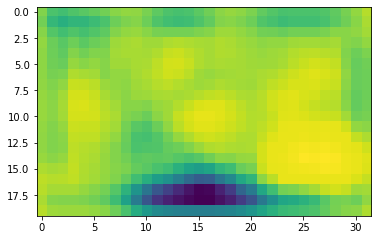

In [ ]:
#pp = plt.imread(my_path)
plt.imshow(sumit.cpu().numpy())
plt.show()

In [ ]:
import cv2

In [ ]:
def my_plot_func(cats, all_data):
  pp = plt.imread("/content/000000487632.jpg")
  for i in range(len(cats)):
    plt.imshow(pp)
    aa = all_data[i]['rewards'][-1].reshape(20,32).cpu().numpy()
    res = cv2.resize(aa, (1680, 1050), interpolation = cv2.INTER_AREA)
    plt.imshow(res, alpha=0.6, cmap='inferno')
    plt.title(cats[i])
    plt.axis('off')
    plt.show()


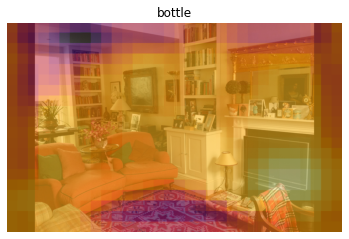

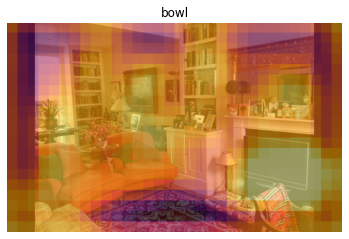

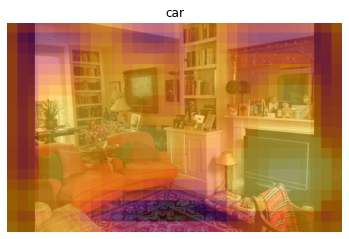

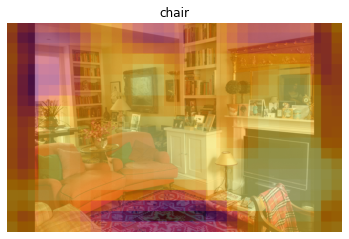

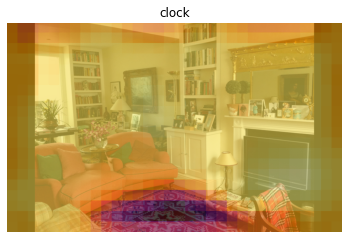

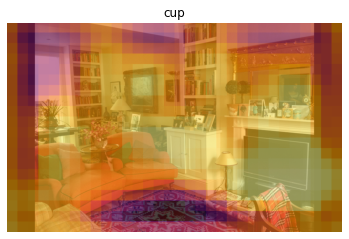

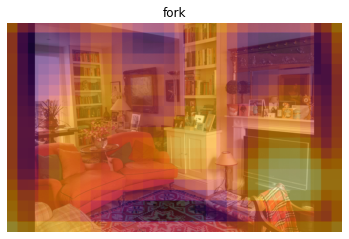

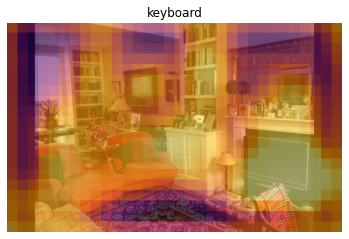

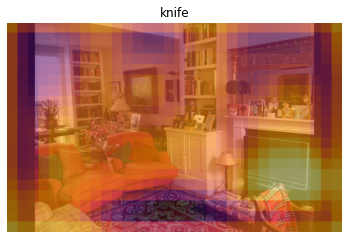

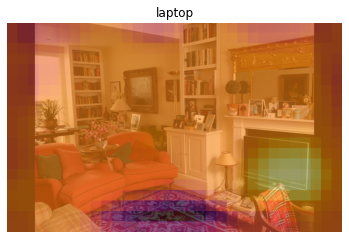

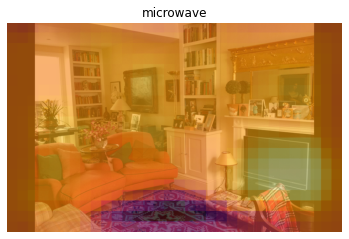

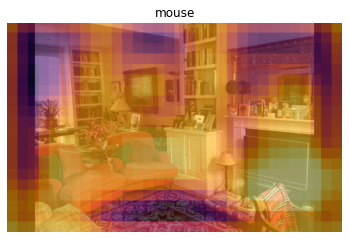

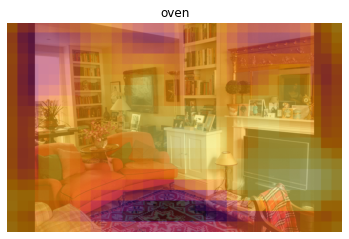

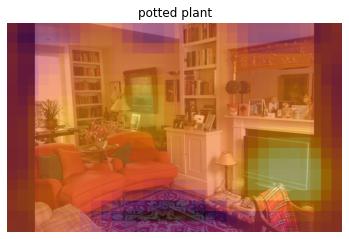

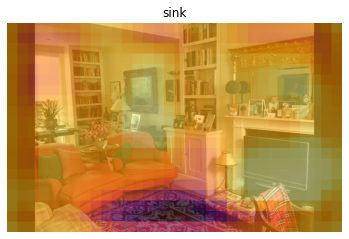

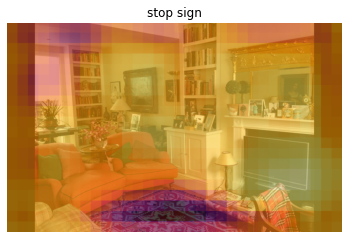

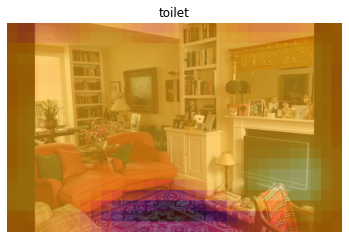

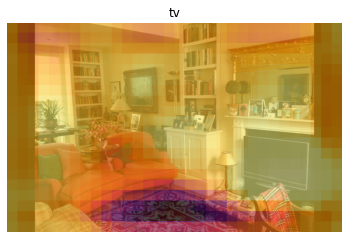

In [ ]:
my_plot_func(catIds_inv, all_data)

## Correlation between different reward maps

In [ ]:
dt = {}
for i in range(len(catIds_inv)):
  aa = all_data[i]['rewards'][0].cpu().numpy()
  dt[catIds_inv[i]] = aa

In [ ]:
import pandas as pd

df = pd.DataFrame(dt)

In [ ]:
df

,bottle,bowl,car,chair,clock,cup,fork,keyboard,knife,laptop,microwave,mouse,oven,potted plant,sink,stop sign,toilet,tv
0,-0.982949,-1.051058,-0.957659,-1.011262,-0.808720,-0.968054,-1.150706,-1.038186,-1.056471,-0.777479,-0.797747,-1.011158,-1.017108,-0.913771,-0.912295,-0.880406,-0.899750,-0.877775
1,-1.188876,-1.240348,-1.145902,-1.174851,-0.898686,-1.207415,-1.577085,-1.319971,-1.345812,-0.852129,-0.825110,-1.269897,-1.268482,-1.042358,-1.037814,-0.975556,-0.969764,-1.034577
2,-1.236220,-1.290749,-1.194217,-1.214130,-0.895007,-1.270786,-1.730308,-1.394645,-1.426829,-0.854879,-0.788247,-1.352173,-1.348206,-1.055689,-1.059139,-0.989380,-0.959139,-1.066206
3,-1.209297,-1.248106,-1.159689,-1.184219,-0.851510,-1.230457,-1.703621,-1.346299,-1.384046,-0.816744,-0.742750,-1.322404,-1.309658,-1.017415,-1.034522,-0.968077,-0.921312,-1.020866
4,-1.172625,-1.209008,-1.125746,-1.159576,-0.835466,-1.193284,-1.643158,-1.299060,-1.328937,-0.792107,-0.728899,-1.277685,-1.263111,-0.975063,-1.015497,-0.951890,-0.904979,-0.989937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.798811,-0.920078,-0.848460,-0.776017,-0.788385,-0.881768,-1.030084,-0.965169,-1.079944,-0.708726,-0.829797,-0.815224,-1.038936,-0.825575,-0.922615,-0.819534,-0.863196,-0.959131
636,-0.767157,-0.893860,-0.826743,-0.766269,-0.743165,-0.825957,-1.000975,-0.918670,-1.037065,-0.661037,-0.744591,-0.793126,-0.965418,-0.768928,-0.876868,-0.784043,-0.811366,-0.905292
637,-0.746238,-0.889825,-0.823661,-0.782102,-0.702626,-0.809401,-1.005869,-0.897772,-1.005006,-0.631903,-0.694200,-0.806975,-0.913183,-0.734501,-0.837769,-0.759160,-0.781101,-0.862739
638,-0.787388,-0.901142,-0.854841,-0.833344,-0.709063,-0.831569,-1.014235,-0.899363,-0.994948,-0.654068,-0.712014,-0.844968,-0.891783,-0.757581,-0.839820,-0.776044,-0.799522,-0.847794


In [ ]:
import seaborn as sns

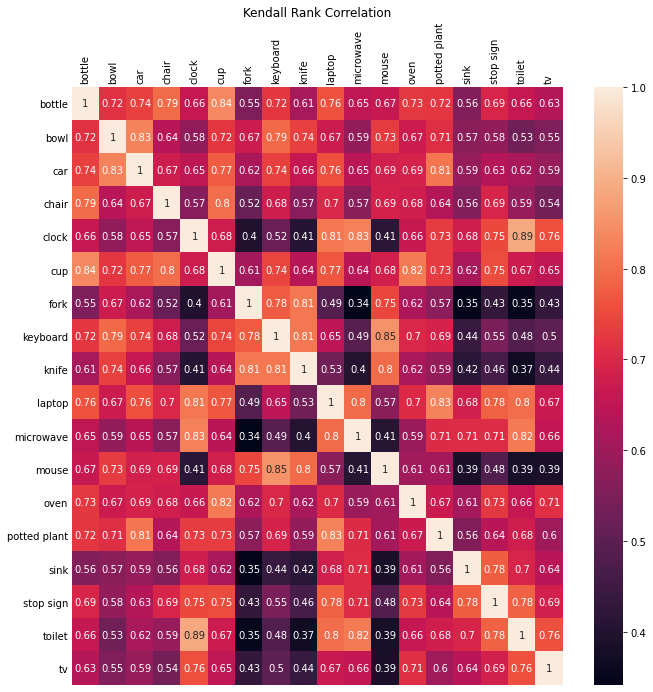

In [ ]:
var = df.corr(method='kendall')
plt.subplots(figsize=(11, 11))
ax =  sns.heatmap(var, xticklabels=var.columns, yticklabels=var.columns, annot=True)
ax.xaxis.tick_top()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(length=0)
plt.title("Kendall Rank Correlation")
plt.show()

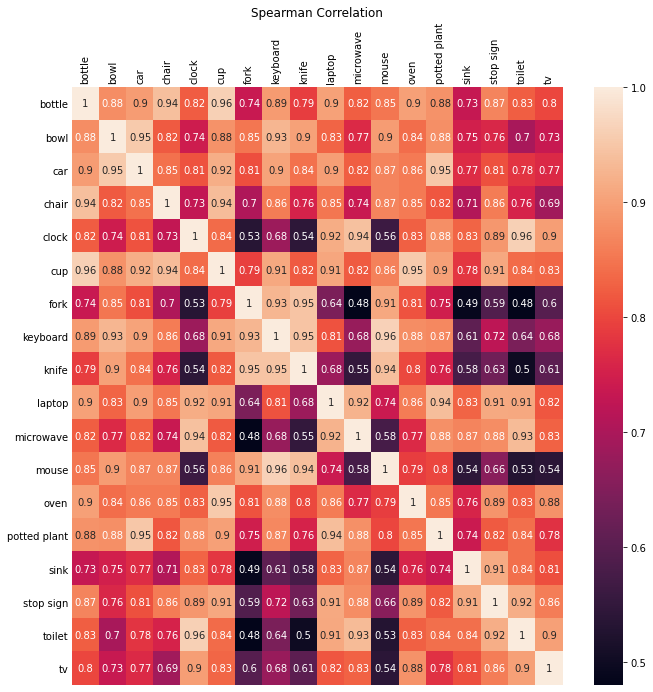

In [ ]:
var = df.corr(method='spearman')
plt.subplots(figsize=(11, 11))
ax =  sns.heatmap(var, xticklabels=var.columns, yticklabels=var.columns, annot=True)
ax.xaxis.tick_top()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(length=0)
plt.title("Spearman Correlation")
plt.show()

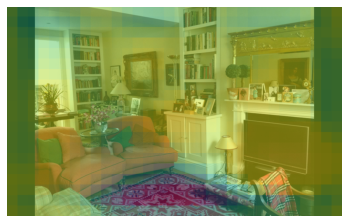

In [ ]:
pp = plt.imread("/content/000000487632.jpg")
plt.imshow(pp)
aa = sumit.cpu().numpy()
resized = cv2.resize(aa, (1680, 1050), interpolation = cv2.INTER_AREA)
plt.imshow(resized, alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
"""pp = plt.imread("/content/000000487632.jpg")
resized = cv2.resize(pp, (32, 20), interpolation = cv2.INTER_AREA)
plt.imshow(resized)

aa = sumit.cpu().numpy()

plt.imshow(aa, alpha=0.0)
plt.show()"""

### Scanpaths

In [ ]:
"""from skimage.transform import resize
pp = plt.imread("/content/000000487632.jpg")
dim = (320, 512)
res = resize(pp, dim)"""

In [ ]:
"""def show_plot(img, xs, ys):
  plt.imshow(res)
  for i in range(len(xs)):
    if i>0:
      plt.arrow(xs[i - 1], ys[i - 1], xs[i] - xs[i - 1],
              ys[i] - ys[i - 1], width=3, color='yellow', alpha=0.5) 
    plt.annotate("{}".format(i+1), xy=(xs[i], ys[i]+3),
               fontsize=10, ha="center", va="center")
  plt.axis('off')
  plt.show()"""

In [ ]:
"""for a in data:
  X , Y = a['X'] , a['Y']
  show_plot(res, X, Y)"""

In [ ]:
"""with open('/content/Scanpath_Prediction/processed/human_scanpaths_TP_trainval_valid.json') as f:
  pq = json.load(f)"""

In [ ]:
"""for a in pq:
  if a['name'] == data['name']:
    pt = a """

In [ ]:
"""X , Y = pt['X'] , pt['Y']"""

In [ ]:
"""show_plot(res, X, Y)"""

## CNN based Saliency Maps

In [ ]:
!git clone https://github.com/idiap/fullgrad-saliency

Cloning into 'fullgrad-saliency'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 184 (delta 96), reused 152 (delta 70), pack-reused 0
Receiving objects: 100% (184/184), 729.75 KiB | 6.63 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [ ]:
cd /content/fullgrad-saliency

/content/fullgrad-saliency


In [ ]:
rm -r /content/fullgrad-saliency/results

In [ ]:
rm -r /content/fullgrad-saliency/images

In [ ]:
rm -r /content/fullgrad-saliency/dataset/imagenet

In [ ]:
cd dataset

/content/fullgrad-saliency/dataset


In [ ]:
mkdir imagenet

In [ ]:
cd ..

/content/fullgrad-saliency


In [ ]:
!python dump_images.py

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Completeness test passed for FullGrad.
Completeness test passed for FullGrad.
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: U

In [ ]:
"""import os
import matplotlib.pyplot as plt
import cv2"""

In [ ]:
"""lt = os.listdir("/content/fullgrad-saliency/results")"""

In [ ]:
"""def all_plot():
  for a in lt:
    path = "/content/fullgrad-saliency/results/"+a
    aa = plt.imread(path)
    res = cv2.resize(aa, (1680, 1050), interpolation = cv2.INTER_AREA)
    plt.imshow(res)
    plt.axes('off')
    plt.show()"""


In [ ]:
"""aa = plt.imread("/content/fullgrad-saliency/results/"+lt[0])
#res = cv2.resize(aa, (1680, 1050), interpolation = cv2.INTER_AREA)
plt.imshow(aa)"""

## Classical Saliency Maps

In [ ]:
!git clone https://github.com/akisatok/pySaliencyMap

Cloning into 'pySaliencyMap'...
remote: Enumerating objects: 54, done.
remote: Total 54 (delta 0), reused 0 (delta 0), pack-reused 54
Unpacking objects: 100% (54/54), done.


In [ ]:
cd /content/pySaliencyMap

/content/pySaliencyMap


In [ ]:
!python main.py

<Figure size 640x480 with 4 Axes>


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
with open("/content/Sal.txt", "rb") as f:
  Sal_map = pickle.load(f)

In [ ]:
with open("/content/Sal_reg.txt", "rb") as f:
  Sal_reg = pickle.load(f)

In [ ]:
with open("/content/Sal_bin.txt", "rb") as f:
  Sal_bin = pickle.load(f)

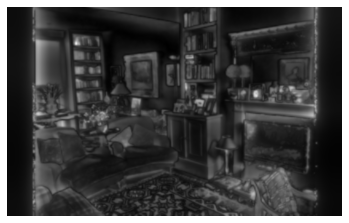

In [ ]:
plt.imshow(cv2.cvtColor(Sal_map, cv2.COLOR_BGR2RGB), cmap='inferno')
plt.axis('off')
plt.show()

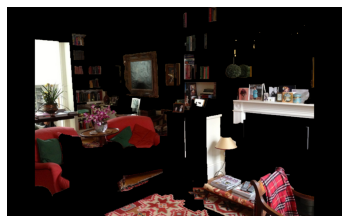

In [ ]:
plt.imshow(cv2.cvtColor(Sal_reg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

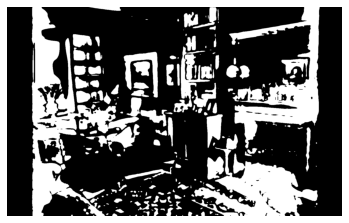

In [ ]:
plt.imshow(cv2.cvtColor(Sal_bin, cv2.COLOR_BGR2RGB), cmap='viridis')
plt.axis('off')
plt.show()

## Saliency Maps using Deepgaze

In [ ]:
!git clone https://github.com/mpatacchiola/deepgaze.git

Cloning into 'deepgaze'...
remote: Enumerating objects: 1324, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 1324 (delta 41), reused 53 (delta 20), pack-reused 1235
Receiving objects: 100% (1324/1324), 239.18 MiB | 30.01 MiB/s, done.
Resolving deltas: 100% (722/722), done.
Checking out files: 100% (170/170), done.


In [ ]:
cd deepgaze


/content/deepgaze


--- 4.031139354000004 Image 1 tot seconds ---


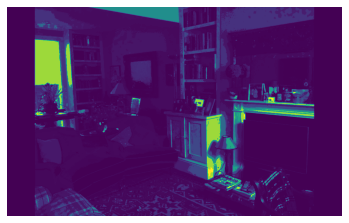

In [ ]:
%run examples/ex_fasa_saliency_map/ex_fasa_saliency_map_images.py